In [2]:
import os

import numpy as np
import matplotlib.pyplot as plt

from utils.audio_control import load_audio

In [3]:
wav_path_list = [os.path.join("audio", f) for f in os.listdir("audio") if f.startswith("hirasaki") and f.endswith(".wav")]
wav_path_list.sort()
print(wav_path_list)

['audio/hirasaki_0.wav', 'audio/hirasaki_1.wav', 'audio/hirasaki_2.wav', 'audio/hirasaki_3.wav', 'audio/hirasaki_4.wav']


In [4]:
wav_list = [load_audio(wav_path) for wav_path in wav_path_list]
print(wav_list)

[(array([  0,   0,   0, ..., 141, 130, 140], dtype=int16), 44100), (array([-268,   95, -420, ..., -231, -122, -251], dtype=int16), 44100), (array([ 38,  34,  59, ..., 260, 223, 251], dtype=int16), 44100), (array([ -764,  -298, -1232, ...,    -4,     0,    -6], dtype=int16), 44100), (array([ 66, 115,  88, ...,  -2,   0,  -2], dtype=int16), 44100)]


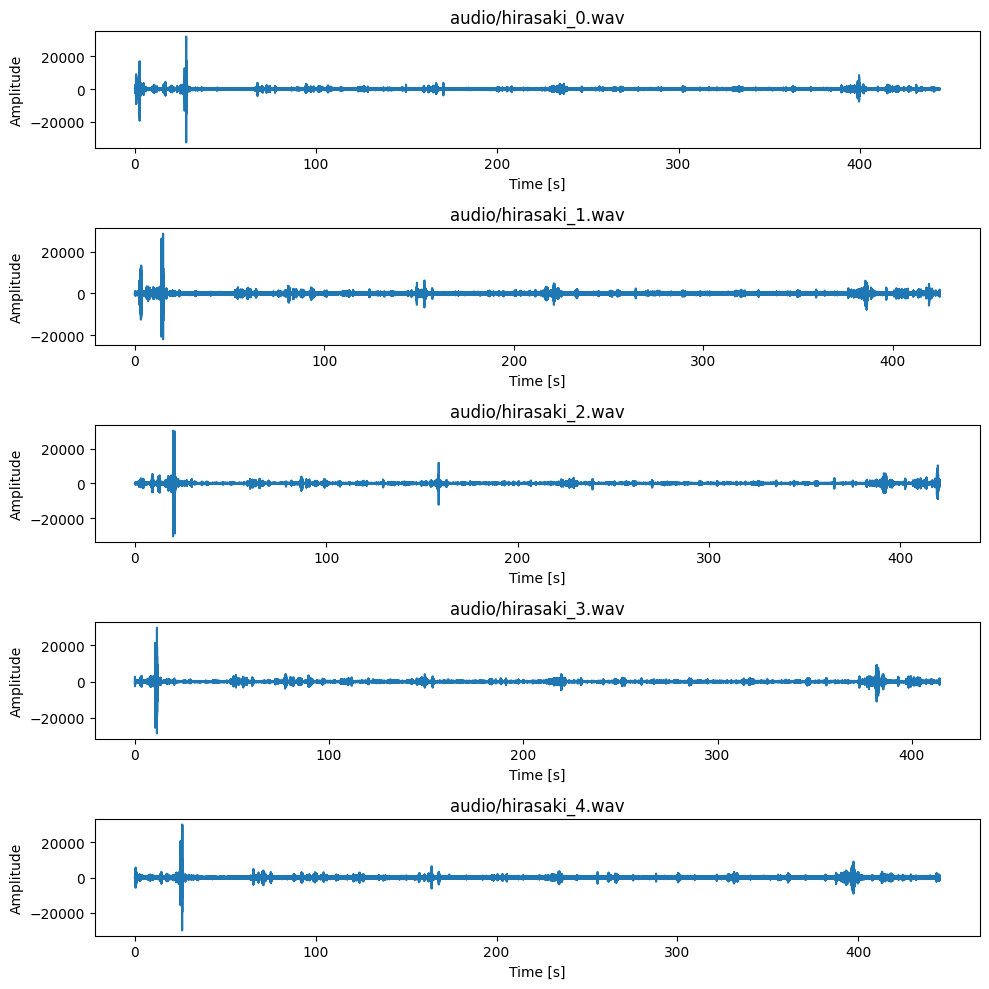

In [5]:
fig, ax = plt.subplots(5, 1, figsize=(10, 10))
for i, wav in enumerate(wav_list):
    data, sample_rate = wav
    ax[i].plot(np.arange(len(data)) / sample_rate, data)
    ax[i].set_title(wav_path_list[i])
    ax[i].set_xlabel("Time [s]")
    ax[i].set_ylabel("Amplitude")
plt.tight_layout()
plt.show()

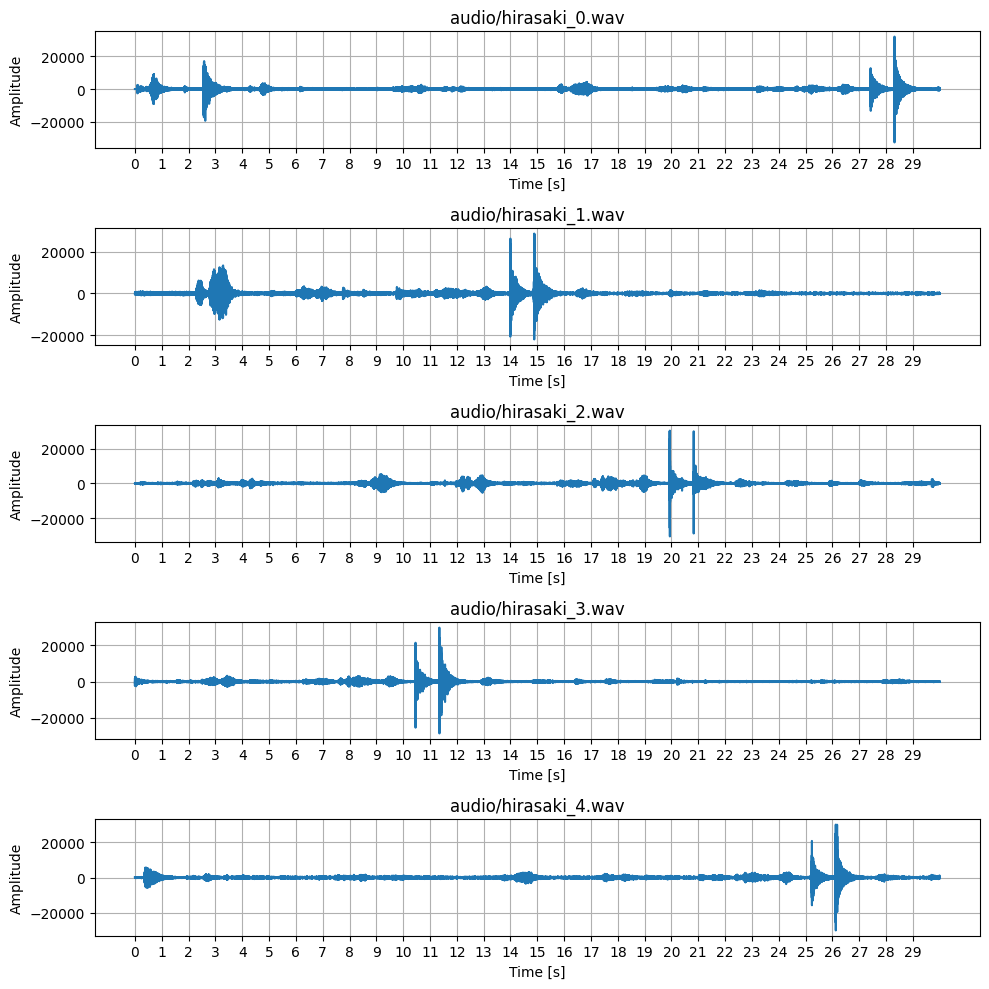

In [6]:
cut_time = 30
cut_data_list = [(data[:cut_time * sample_rate], sample_rate) for data, sample_rate in wav_list]

fig, ax = plt.subplots(5, 1, figsize=(10, 10))
for i, cut_data in enumerate(cut_data_list):
    data, sample_rate = cut_data
    ax[i].plot(np.arange(len(data)) / sample_rate, data)
    ax[i].set_title(wav_path_list[i])
    ax[i].set_xlabel("Time [s]")
    ax[i].set_ylabel("Amplitude")
    ax[i].set_xticks(np.arange(0, cut_time, 1))
    ax[i].grid()
plt.tight_layout()
plt.show()

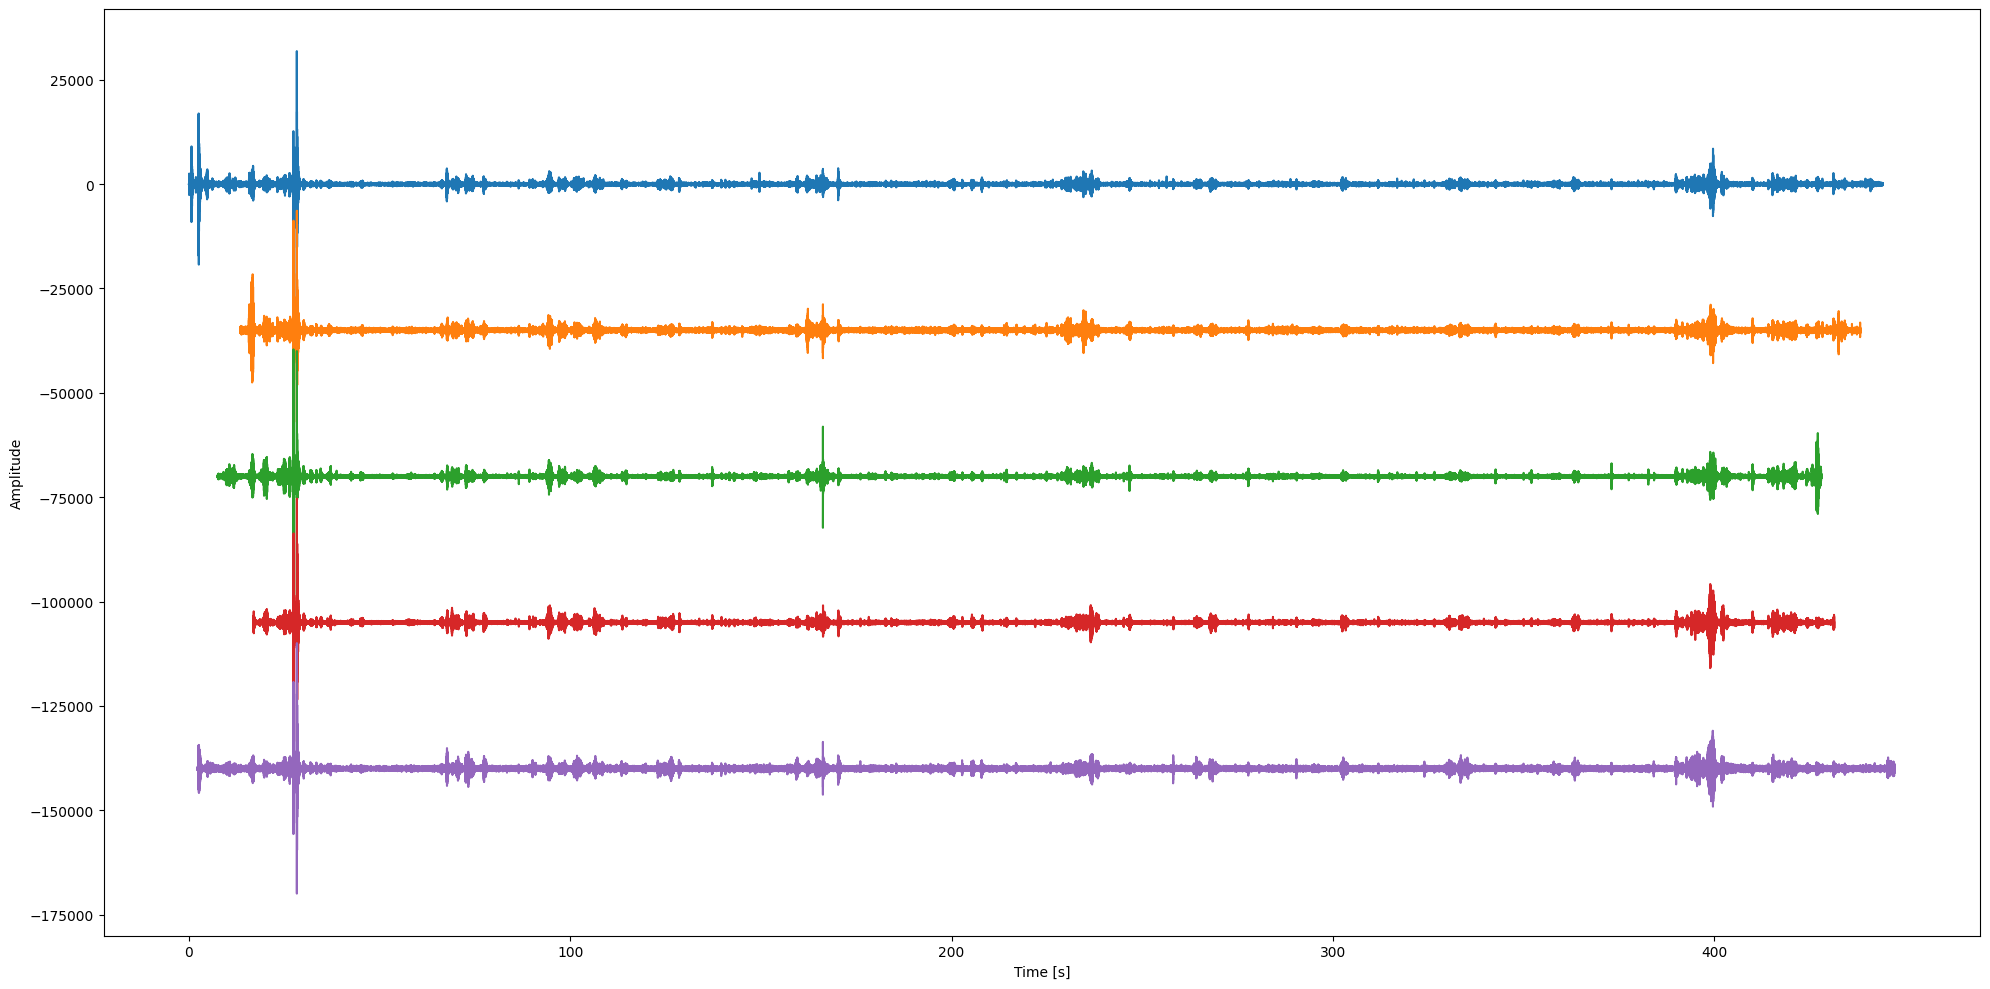

In [8]:
# ずれを考慮して可視化
delay_list = [0, 13.45, 7.5, 17.0, 2.2]
fig, ax = plt.subplots(figsize=(20, 10))
for i, cut_data in enumerate(wav_list):
    data, sample_rate = cut_data
    ax.plot(np.arange(len(data)) / sample_rate + delay_list[i], data - i * 35000, label=wav_path_list[i])
    # ax.set_title(wav_path_list[i])
    ax.set_xlabel("Time [s]")
    ax.set_ylabel("Amplitude")
plt.tight_layout()
# plt.legend()
plt.show()